<a href="https://colab.research.google.com/github/Kaendill/Shopping-trends/blob/main/Shopping_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Dictionary:**


---



1.  Customer ID - Unique identifier for each customer.

2.   Age - Age of the customer.

3.   Gender - Gender of the customer (Male/Female).

4.   Item Purchased - The item purchased by the customer.

5.   Category - Category of the item purchased

6.   Purchase Amount (USD) - The amount of the purchase in USD.

7.   Location - Location where the purchase was made.

8.   Size - Size of the purchased item.

9.   Color - Color of the purchased item.

10.  Season - Season during which the purchase was made.

11.  Review Rating - Rating given by the customer for the purchased item.

12.  Subscription Status - Indicates if the customer has a subscription (Yes/No).

13.   Shipping Type - Type of shipping chosen by the customer.

14.   Discount Applied - Indicates if a discount was applied to the purchase (Yes/No).

15.   Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No).
16.   Previous Purchases - Number of previous purchases made by the customer.

17.  Payment Method - Customer's most preferred payment method.

18.   Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).






importing Libraries

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

Loading the Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)
file_path = f"{path}/shopping_trends_updated.csv"
df= pd.read_csv(file_path)
df.sample(10)  # inspecting the dataset

100%|██████████| 146k/146k [00:00<00:00, 36.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
624,625,55,Male,Pants,Clothing,87,South Carolina,XL,Pink,Fall,3.40,Yes,Express,Yes,Yes,21,PayPal,Annually
829,830,42,Male,Socks,Clothing,57,Idaho,S,Silver,Spring,3.10,Yes,2-Day Shipping,Yes,Yes,14,Credit Card,Fortnightly
2884,2885,55,Female,Boots,Footwear,50,Arkansas,M,Purple,Summer,3.40,No,2-Day Shipping,No,No,47,Credit Card,Every 3 Months
2460,2461,58,Male,Jeans,Clothing,36,Maine,S,Lavender,Winter,4.00,No,Store Pickup,No,No,28,Credit Card,Annually
2926,2927,64,Female,Handbag,Accessories,82,Maryland,M,Gray,Winter,4.80,No,2-Day Shipping,No,No,9,Cash,Weekly
1208,1209,20,Male,Boots,Footwear,100,Wisconsin,S,Red,Winter,2.90,No,2-Day Shipping,Yes,Yes,8,Debit Card,Annually
3031,3032,61,Female,Blouse,Clothing,74,Idaho,L,Teal,Summer,4.90,No,2-Day Shipping,No,No,30,Credit Card,Monthly
993,994,51,Male,Sandals,Footwear,90,Iowa,M,Peach,Winter,4.40,Yes,Store Pickup,Yes,Yes,25,Cash,Weekly
1084,1085,34,Male,T-shirt,Clothing,36,Arkansas,S,Purple,Fall,4.10,No,Next Day Air,Yes,Yes,48,Cash,Quarterly
165,166,42,Male,Handbag,Accessories,60,Kentucky,S,Yellow,Winter,2.80,Yes,Store Pickup,Yes,Yes,7,Cash,Monthly


Checking the Data Description

In [ ]:
print('Shape:\n', df.shape)   # to see the number of columns and rows

Shape:
 (3900, 18)


In [ ]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
df.describe(include='object').T   # KEY DETAILS AT A GLANCE

,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223


In [ ]:
print('Info:\n', df.info())    #to see the datatypes of the different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Check for null values

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


Check for Duplicate values

In [ ]:
df.duplicated().sum()

0

Visual Representation Of Genders

Text(0.5, 1.0, 'Distribution of Customers by Gender')

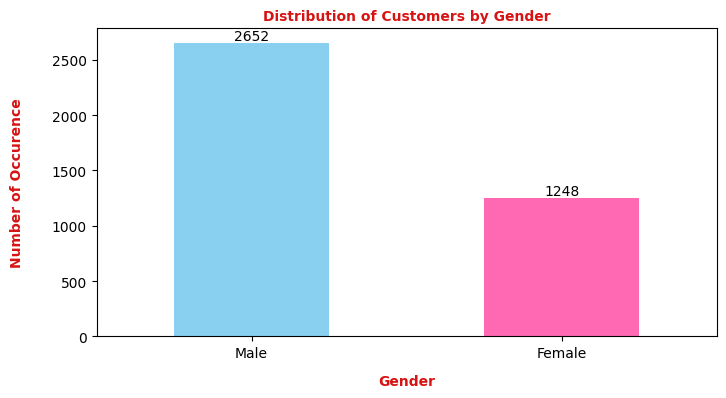

In [ ]:
plt.figure(figsize= (8,4))
ax= df['Gender'].value_counts().plot(kind= 'bar', color= colors, rot= 0)
ax.set_xticklabels(('Male', 'Female'))

#annoting..

for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x()+ 0.25, p.get_height()+ 1), ha= 'center', va= 'bottom', color= 'black')

ax.tick_params(axis= 'both', labelsize= 10)
plt.xlabel('Gender', weight= 'bold', color= "#D71313", labelpad= 10, fontsize= 10 )
plt.ylabel('Number of Occurence', weight = 'bold', color= "#D71313", labelpad= 20, fontsize= 10)

plt.title('Distribution of Customers by Gender',weight = 'bold', color= "#D71313", fontsize= 10 )


Using a pie-chart

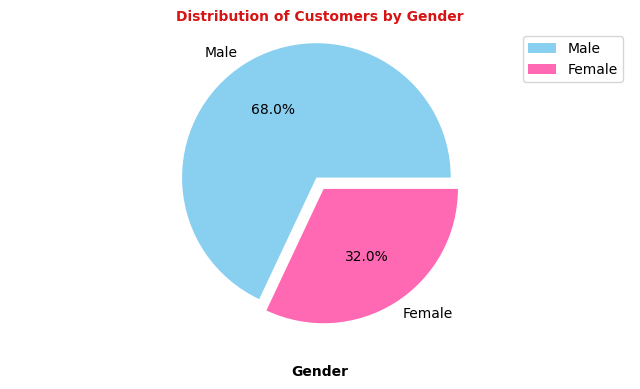

In [ ]:
plt.figure(figsize= (8,4))
counts= df['Gender'].value_counts()
explode= (0,0.1)

counts.plot(kind= 'pie', colors= colors, explode= explode, autopct= '%1.1f%%', fontsize= 10)

plt.axis('equal')
plt.xlabel('Gender', weight= 'bold', color= 'black', labelpad= 20)
plt.legend(labels= counts.index, loc= 'best')
plt.title('Distribution of Customers by Gender',weight = 'bold', color= "#D71313", fontsize= 10 )
plt.ylabel('')
plt.show()

Age Distribution

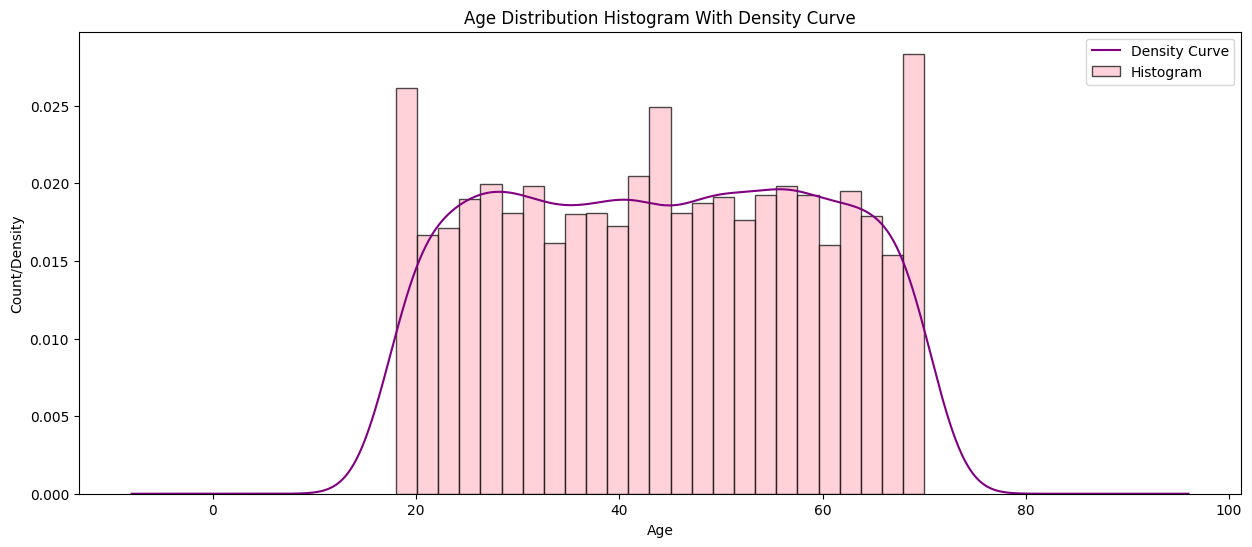

In [ ]:
fig, ax= plt.subplots(figsize=(15,6))
ax.hist(df['Age'], bins= 25, density= True, edgecolor= 'black', color= 'pink', alpha= 0.7)   # plotting the histogram
df['Age'].plot(kind= 'kde', color= 'purple', ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count/Density')
ax.legend(['Density Curve', 'Histogram'])
ax.set_title('Age Distribution Histogram With Density Curve')
plt.show()

Category Distribution

In [ ]:
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


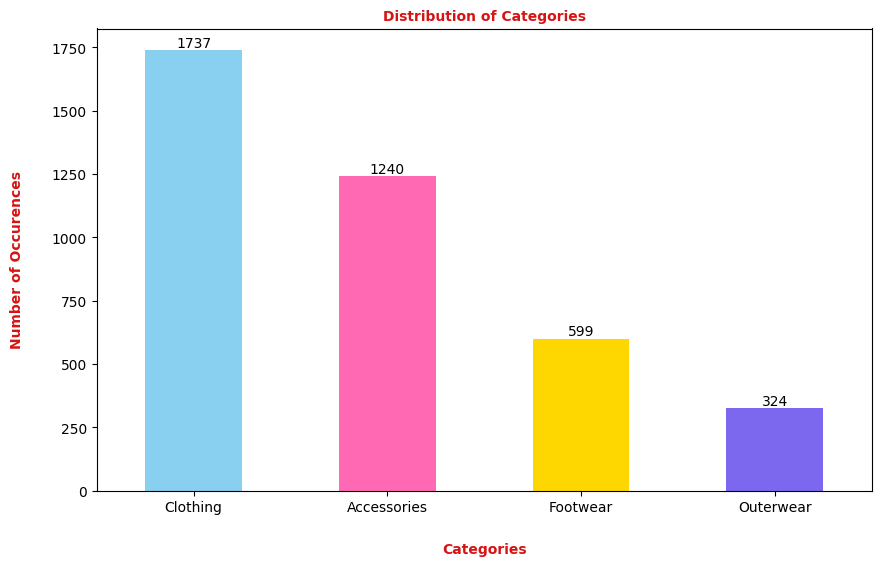

In [ ]:
plt.figure(figsize=(10,6))
ax= df['Category'].value_counts().plot(kind= 'bar', color= colors, rot= 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

# Annoting...

for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha= 'center', va= 'bottom', color= 'black')
ax.tick_params(axis= 'both', labelsize= 10)
plt.xlabel('Categories', weight= 'bold', color= "#D71313", labelpad= 20, fontsize= 10)
plt.ylabel('Number of Occurences', weight= 'bold', color= "#D71313", labelpad= 20, fontsize= 10)
plt.title('Distribution of Categories', weight= 'bold', color= "#D71313", fontsize= 10)
plt.show()

Using A Pie-Chart

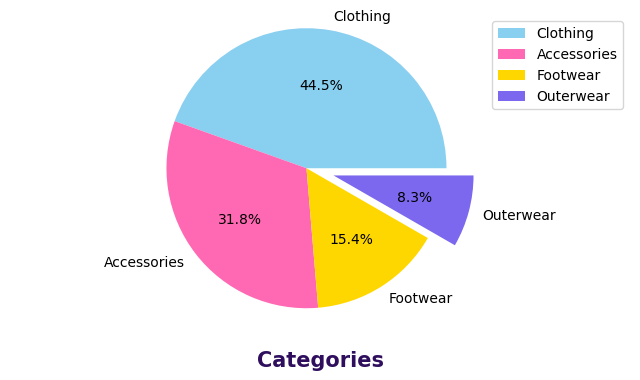

In [ ]:
plt.figure(figsize= (8,4))

df['Category'].value_counts().plot(kind='pie', autopct= '%1.1f%%', colors= colors, explode= (0, 0.0, 0.0, 0.2), fontsize= 10 )
plt.ylabel('')
plt.xlabel('Categories', weight= 'bold', color= '#2F0F5D', labelpad= 20, fontsize= 15)
plt.legend(labels= df['Category'].value_counts().index, loc= 'best' )
plt.axis('equal')
plt.show()

Items Purchased

In [ ]:
df['Item Purchased'].value_counts().reset_index()

,Item Purchased,count
0,Blouse,171
1,Jewelry,171
2,Pants,171
3,Shirt,169
4,Dress,166
5,Sweater,164
6,Jacket,163
7,Belt,161
8,Sunglasses,161
9,Coat,161


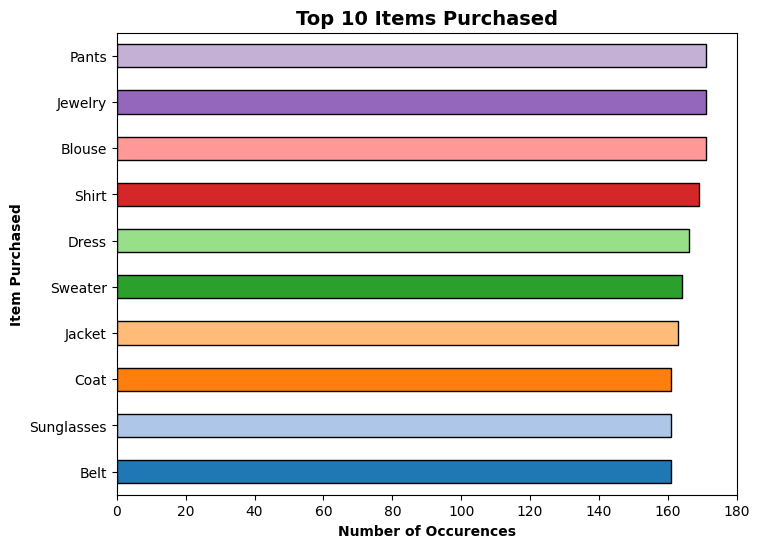

In [ ]:
plt.figure(figsize=(8,6))
df['Item Purchased'].value_counts().head(10).sort_values(ascending= True).plot(kind= 'barh', color= sns.color_palette('tab20'), edgecolor= 'black')
plt.xlabel('Number of Occurences', fontsize= 10, weight= 'bold')
plt.ylabel('Item Purchased', fontsize= 10, weight= 'bold')
plt.title('Top 10 Items Purchased', fontsize= 14, weight= 'bold')
plt.xlim(0,180)
plt.show()


Location Distribution

In [ ]:
df['Location'].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


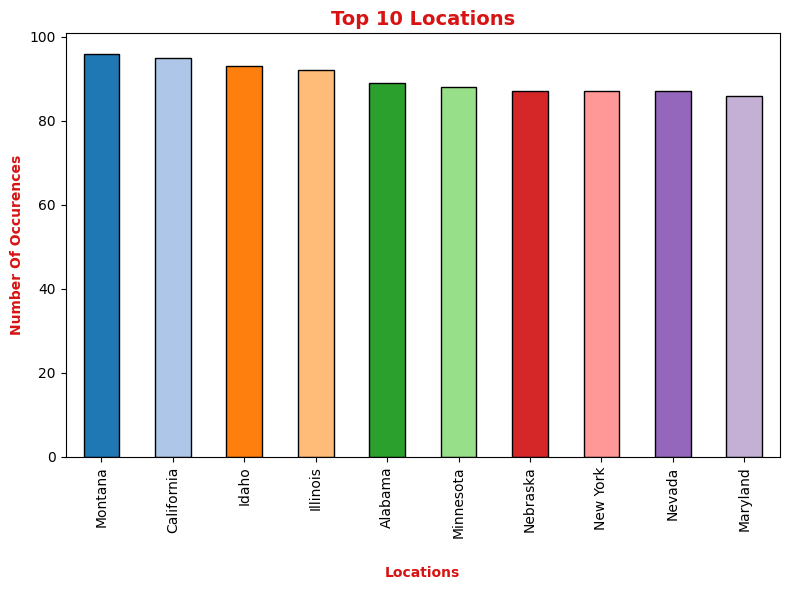

In [ ]:
plt.figure(figsize=(8,6))
df['Location'].value_counts()[:10].sort_values(ascending= False).plot(kind= 'bar', color= sns.color_palette('tab20'), edgecolor= 'black')
plt.xlabel('Locations', fontsize= 10, weight= 'bold', color = "#D71313", labelpad= 20)
plt.ylabel('Number Of Occurences', fontsize= 10, weight= 'bold', color = "#D71313")
plt.title('Top 10 Locations', fontsize= 14, weight= 'bold', color = "#D71313")
plt.tight_layout()
plt.show()


Size Distribution

In [ ]:
df['Size'].value_counts()

,count
Size,
M,1755
L,1053
S,663
XL,429


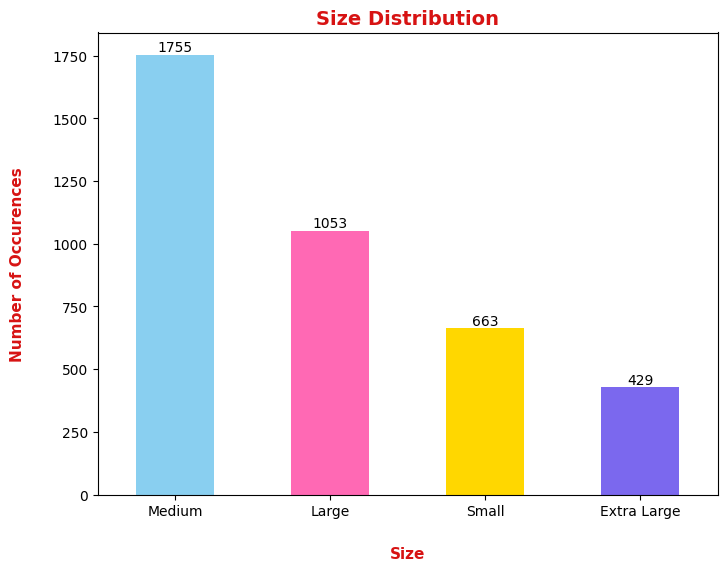

In [ ]:
plt.figure(figsize=(8,6))
ax= df['Size'].value_counts().plot(kind= 'bar', color= colors, rot= 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x()+ 0.25, p.get_height() + 1), ha= 'center', va= 'bottom', color= 'black')

ax.tick_params(axis= 'both', labelsize= 10)
ax.set_xlabel('Size', labelpad= 20, weight= 'bold', fontsize= 11, color= "#D71313")
ax.set_ylabel('Number of Occurences', labelpad= 20, weight= 'bold', fontsize= 11, color= "#D71313")
plt.title('Size Distribution', weight= 'bold', fontsize= 14, color= "#D71313")
plt.show()

Using a Pie-Chart (To represent the size distribution)






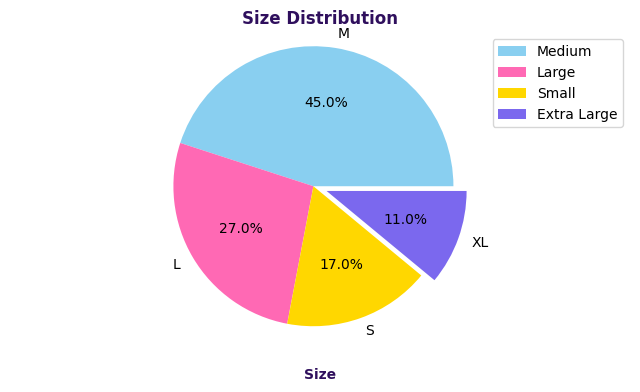

In [ ]:
plt.figure(figsize=(8,4))
df['Size'].value_counts().plot(kind= 'pie', colors= colors, explode= (0, 0.0, 0.0, 0.1), autopct= '%1.1f%%', fontsize= 10)
plt.ylabel('')
plt.xlabel('Size', weight= 'bold', labelpad= 20, color= '#2F0F5D')
plt.axis('equal')
plt.legend(('Medium', 'Large', 'Small', 'Extra Large'), loc= 'best')
plt.title('Size Distribution', color='#2F0F5D', weight= 'bold')
plt.show()

Seasons Distribution

In [ ]:
df['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


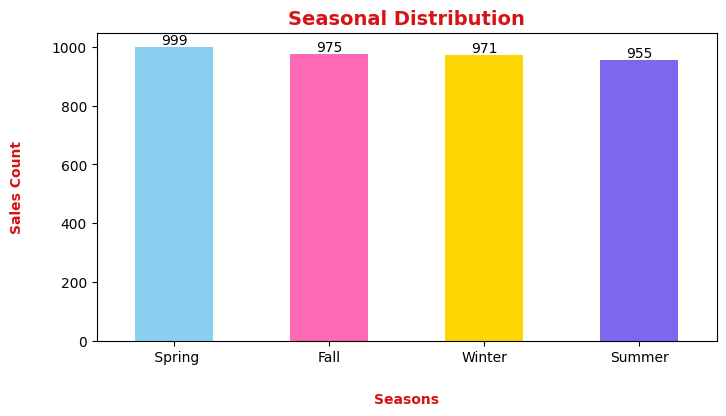

In [ ]:
plt.figure(figsize=(8,4))
ax = df['Season'].value_counts().plot(kind= 'bar', color= colors, rot= 0)
ax.set_xticklabels((' Spring', 'Fall', 'Winter', 'Summer'))

#Annoting...

for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha= "center", va= 'bottom', color= 'black')
  ax.tick_params(axis= 'both', labelsize= 10)

plt.xlabel('Seasons', labelpad= 20, color= "#D71313", weight= 'bold', fontsize= 10)
plt.ylabel('Sales Count', labelpad= 20, color= "#D71313", weight= 'bold', fontsize= 10)
plt.title('Seasonal Distribution', fontsize= 14, color= "#D71313", weight= 'bold')
plt.show()

Subscription Status

In [ ]:
df['Subscription Status'].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


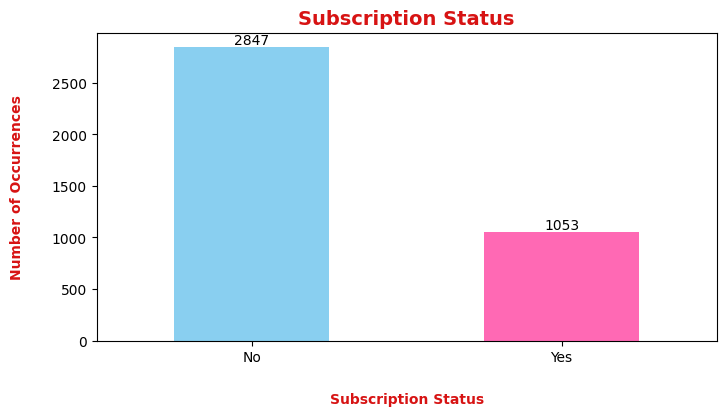

In [ ]:
plt.figure(figsize=(8,4))
ax = df['Subscription Status'].value_counts().plot(kind= 'bar', color= colors, rot= 0)
ax.set_xticklabels(('No', 'Yes'))

#Annoting...

for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha= "center", va= 'bottom', color= 'black')
  ax.tick_params(axis= 'both', labelsize= 10)

plt.xlabel('Subscription Status', labelpad= 20, color= "#D71313", weight= 'bold', fontsize= 10)
plt.ylabel('Number of Occurrences', labelpad= 20, color= "#D71313", weight= 'bold', fontsize= 10)
plt.title('Subscription Status', fontsize= 14, color= "#D71313", weight= 'bold')
plt.show()

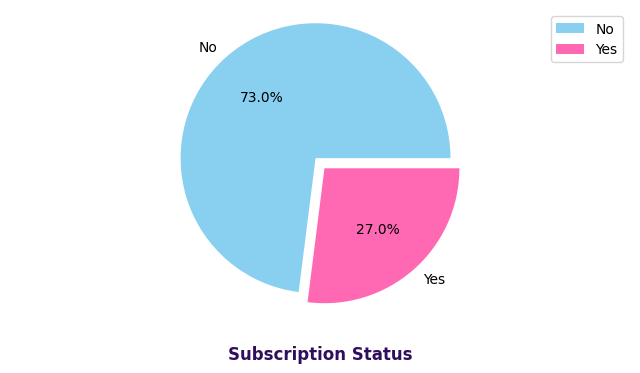

In [ ]:
plt.figure(figsize=(8,4))
df['Subscription Status'].value_counts().plot(kind= 'pie', colors= colors, autopct= '%1.1f%%', explode= (0,0.1), fontsize= 10)
plt.axis('equal')
plt.xlabel('Subscription Status',fontsize= 12, color= "#2F0F5D", weight= 'bold', labelpad= 20)
plt.ylabel('')
plt.legend(labels= df['Subscription Status'].value_counts().index, loc= 'best')
plt.show()

Payment Method

In [ ]:
df['Payment Method'].value_counts()

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


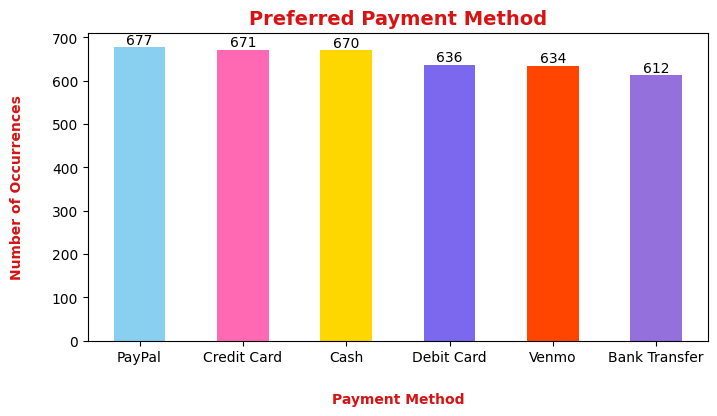

In [ ]:
plt.figure(figsize=(8,4))
ax = df['Payment Method'].value_counts().plot(kind= 'bar', color= colors, rot= 0)
ax.set_xticklabels(('PayPal', 'Credit Card', 'Cash', 'Debit Card', 'Venmo', 'Bank Transfer'))

#Annoting...

for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha= "center", va= 'bottom', color= 'black')
  ax.tick_params(axis= 'both', labelsize= 10)

plt.xlabel('Payment Method', labelpad= 20, color= "#D71313", weight= 'bold', fontsize= 10)
plt.ylabel('Number of Occurrences', labelpad= 20, color= "#D71313", weight= 'bold', fontsize= 10)
plt.title('Preferred Payment Method', fontsize= 14, color= "#D71313", weight= 'bold')
plt.show()

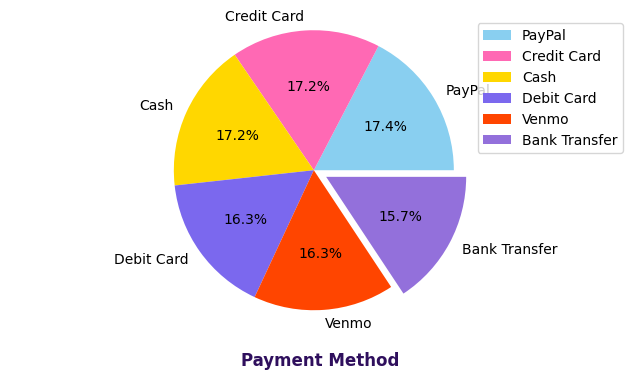

In [ ]:
plt.figure(figsize=(8,4))
df['Payment Method'].value_counts().plot(kind= 'pie', colors= colors, autopct= '%1.1f%%', explode= (0,0.0, 0.0, 0.0, 0.0, 0.1), fontsize= 10)
plt.axis('equal')
plt.xlabel('Payment Method',fontsize= 12, color= "#2F0F5D", weight= 'bold', labelpad= 20)
plt.ylabel('')
plt.legend(labels= df['Payment Method'].value_counts().index, loc= 'best')
plt.show()

Frequency of Purchases

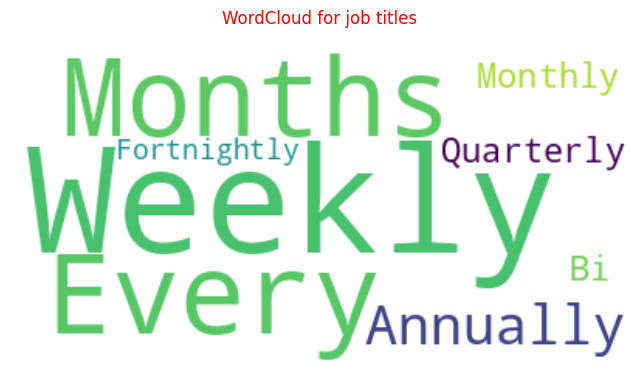

In [ ]:
text= " ".join(title for title in df['Frequency of Purchases'])
word_cloud= WordCloud(collocations=False, background_color= 'white').generate(text)
plt.figure(figsize=(8,6))
plt.imshow(word_cloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('WordCloud for job titles\n', fontsize= 12, color="#FF0000")
plt.show()

In [ ]:
df['Frequency of Purchases'].value_counts()

,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


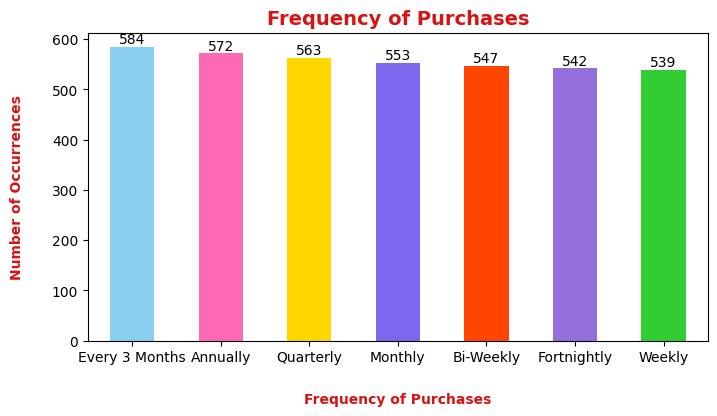

In [ ]:
plt.figure(figsize=(8,4))
ax = df['Frequency of Purchases'].value_counts().plot(kind= 'bar', color= colors, rot= 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

#Annoting...

for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha= "center", va= 'bottom', color= 'black')
  ax.tick_params(axis= 'both', labelsize= 10)

plt.xlabel('Frequency of Purchases', labelpad= 20, color= "#D71313", weight= 'bold', fontsize= 10)
plt.ylabel('Number of Occurrences', labelpad= 20, color= "#D71313", weight= 'bold', fontsize= 10)
plt.title('Frequency of Purchases', fontsize= 14, color= "#D71313", weight= 'bold')
plt.show()

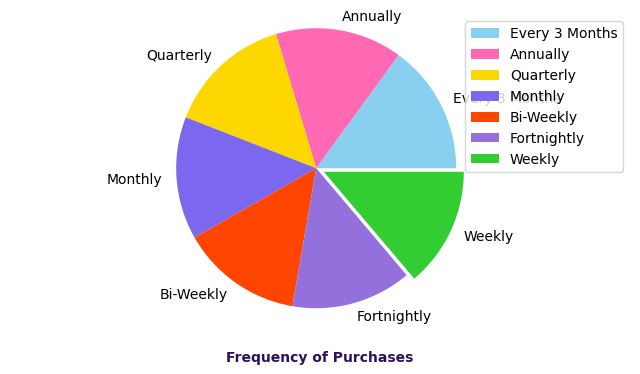

In [ ]:
plt.figure(figsize=(8,4))
df['Frequency of Purchases'].value_counts().plot(kind= 'pie', colors= colors, explode= (0,0.0,0.0,0.0,0.0,0.0,0.06), fontsize=10 )
plt.axis('equal')
plt.xlabel('Frequency of Purchases', weight= 'bold', fontsize= 10, color="#2F0F5D", labelpad= 20)
plt.ylabel('')
plt.legend(labels= df['Frequency of Purchases'].value_counts().index, loc= 'best')
plt.show()

MORE SPECIFIC INSIGHTS...


*   What is the average age of customers in the dataset ?




In [ ]:
age= df['Age'].mean()
print(f'Average age of customers in the dataset is: {int(age)} years')

Average age of customers in the dataset is: 44 years



*  What is the most common item purchased ?




In [ ]:
item= df['Item Purchased'].mode()[0]
print(f'Most common item purchased: {item}')


Most common item purchased: Blouse



*   What is the total purchase amount for each category ?




In [ ]:
amount= df.groupby('Category')['Purchase Amount (USD)'].sum()
print('Total Purchase Amount per Category:\n', amount)

Total Purchase Amount per Category:
 Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64



*  What is the average review rating for male customers and female customers
separately ?

In [ ]:
male = df[df['Gender']== 'Male']['Review Rating'].mean()
female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print(f' Average Review Rating for Female Customers : {female:.2f}')
print(f' Average Review Rating for Male Customers : {male:.2f}')

 Average Review Rating for Female Customers : 3.74
 Average Review Rating for Male Customers : 3.75



*  What is the most common payment method used by customers ?




In [ ]:
method = df['Payment Method'].mode()[0]
print(f'Most Common Payment Method used by customers: {method}')

Most Common Payment Method used by customers: PayPal



*   What is the median purchase amount (USD) ?




In [ ]:
median = df['Purchase Amount (USD)'].median()
print(f' Median Purchase Amount (USD): ${median}')

 Median Purchase Amount (USD): $60.0



* How many customers have opted for the Subscription ?




In [ ]:
sub = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print(f' Number of Customers With Subscription: {sub}')

 Number of Customers With Subscription: 1053



*   What is the average purchase amount for customers with a subscription status of 'Yes' and 'No' ?




In [ ]:
mean_sub = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
print(f'Average purchase amount for customers with a subscription status of Yes and No:\n {mean_sub}')

Average purchase amount for customers with a subscription status of Yes and No:
 Subscription Status
No    59.87
Yes   59.49
Name: Purchase Amount (USD), dtype: float64



*   What is the most common season for purchases ?




In [ ]:
common_season = df['Season'].mode()[0]
print(f' Most Common Season for Purchases is {common_season}')

 Most Common Season for Purchases is Spring



*   What is the total purchase amount for each gender ?




In [ ]:
df.groupby('Gender')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Gender,
Female,75191
Male,157890



*  What is the average age of customers who made purchases in the Summer season ?




In [ ]:
summer_age = df[df['Season'] == 'Summer']['Age'].mean()
print(f'Average age of customers who made purchases in the Summer season is {int(summer_age)} years')

Average age of customers who made purchases in the Summer season is 43 years



*  How many customers used a promo code for their purchase ?




In [ ]:
promo_code_used = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print(f'The number of customers who used promo code for their purchases is {promo_code_used}')

The number of customers who used promo code for their purchases is 1677



*   What is the maximum and minimum review rating in the dataset ?




In [ ]:
min = df['Review Rating'].min()
max = df['Review Rating'].max()
print(f'The maximum and minimum review rating in the dataset respectively is {max, min}')

The maximum and minimum review rating in the dataset respectively is (5.0, 2.5)



*  What is the most common shipping type for customers with a review rating above 4 ?




In [ ]:
above_4_shipping = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print(f'The most common shipping type for customers with a review rating above 4 is {above_4_shipping}')

The most common shipping type for customers with a review rating above 4 is Standard



*   How many customers have made more than 30 previous purchases ?




In [ ]:
more_than_30_pp = df[df['Previous Purchases'] > 30]['Customer ID'].count()
print(f'{more_than_30_pp} customers have made more than 30 previous purchases')

1549 customers have made more than 30 previous purchases



*  What is the average purchase amount for customers who have made more than 30 previous purchases ?




In [ ]:
avg_amount_more_than_30_pp = df[df['Previous Purchases'] > 30]['Purchase Amount (USD)'].mean()
print(f'Average purchase amount for customers who have made more than 30 previous purchases is ${avg_amount_more_than_30_pp:.2f}')

Average purchase amount for customers who have made more than 30 previous purchases is $60.03



*   What is the most common payment method for customers who shop in the Winter season ?




In [ ]:
common_payment_method = df[df['Season'] == 'Winter']['Payment Method'].mode()[0]
print(f'{common_payment_method} is the most common payment method for customers who shop in the Winter season')

PayPal is the most common payment method for customers who shop in the Winter season



*  What is the total purchase amount for customers with a 'Free Shipping' shipping type ?




In [ ]:
free_ship_total = df[df['Shipping Type'] =='Free Shipping' ]['Purchase Amount (USD)'].sum()
print(f'The total purchase amount for customers with a Free Shipping shipping type is ${free_ship_total}')

The total purchase amount for customers with a Free Shipping shipping type is $40777



* What is the average purchase amount for customers who used a discount ?




In [ ]:
disc_purc_amt = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
print(f'The average purchase amount for customers who used a discount is ${disc_purc_amt:.2f}')

The average purchase amount for customers who used a discount is $59.28



*   What is the most common category of items purchased by female customers with a review rating below 3 ?




In [ ]:
female_top_shop_3 = df[(df['Review Rating'] < 3) & (df['Gender'] == 'Female')]['Category'].mode()[0]
print(f'The most common category of items purchased by female customers with a review rating below 3 is {female_top_shop_3}')

The most common category of items purchased by female customers with a review rating below 3 is Clothing



*   What is the average age of customers who made purchases with a review rating above 4 and used a promo code?




In [ ]:
promo_customers_above_4 = df[(df['Promo Code Used'] == 'Yes') & (df['Review Rating'] > 4 )]['Age'].mean()
print(f'The average age of customers who made purchases with a review rating above 4 and used a promo code is {promo_customers_above_4:.0f} years old')

The average age of customers who made purchases with a review rating above 4 and used a promo code is 44 years old



*   What is the total purchase amount for customers in each location ?




In [ ]:
total_purc_loc = df.groupby('Location')['Purchase Amount (USD)'].sum()
print(f'Total purchase amount for customers in each location:\n{total_purc_loc}')


Total purchase amount for customers in each location:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota     


*   What is the average purchase amount for customers who have a subscription and used Venmo as the payment method ?




In [ ]:
venmo_sub = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo')] ['Purchase Amount (USD)'].mean()
print(f'The average purchase amount for customers who have a subscription and used Venmo as the payment method is ${venmo_sub:.2f}')

The average purchase amount for customers who have a subscription and used Venmo as the payment method is $57.51



*   What is the frequency distribution of the 'Frequency of Purchases' column ?




In [ ]:
freq_purs = df['Frequency of Purchases'].value_counts()
print(f' frequency distribution of the Frequency of Purchases column:\n {freq_purs} ')

 frequency distribution of the Frequency of Purchases column:
 Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64 



*   What is the average purchase amount for each color of items ?




In [ ]:
avg_color = df.groupby('Color')['Purchase Amount (USD)'].mean()
print(f'The average purchase amount for each color of items:\n{avg_color}')

The average purchase amount for each color of items:
Color
Beige       60.41
Black       58.40
Blue        56.95
Brown       59.06
Charcoal    60.63
Cyan        61.89
Gold        61.01
Gray        62.49
Green       65.70
Indigo      56.25
Lavender    59.13
Magenta     57.13
Maroon      59.53
Olive       58.15
Orange      60.89
Peach       59.19
Pink        60.59
Purple      60.01
Red         59.32
Silver      56.83
Teal        60.81
Turquoise   55.61
Violet      61.72
White       62.64
Yellow      59.24
Name: Purchase Amount (USD), dtype: float64



*  KDE plot for Purchase Amount by Season




Text(0.5, 0, 'Purchase Amount (USD)')

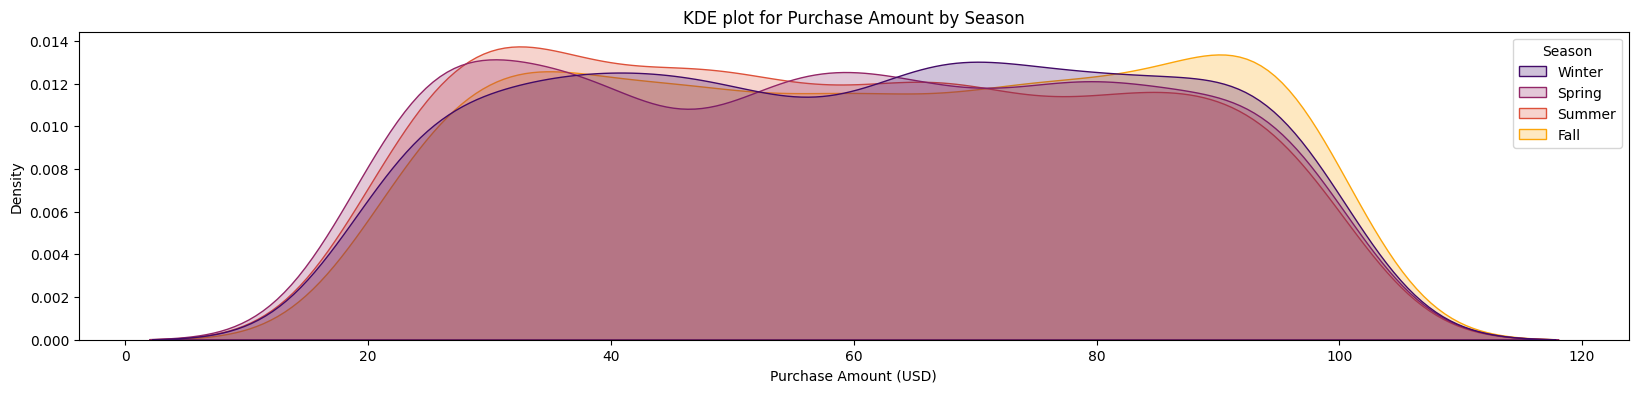

In [ ]:
plt.figure(figsize=(20,4))
sns.kdeplot(df, x= 'Purchase Amount (USD)', common_norm= False, fill= True, hue= 'Season', palette= 'inferno')
plt.title('KDE plot for Purchase Amount by Season')
plt.xlabel('Purchase Amount (USD)')


*  What is the most common payment method for customers who purchased items in the Fall season ?




In [ ]:
fall_pmt_method = df[df['Season'] == 'Fall']['Payment Method'].mode()[0]
print(f'The most common payment method for customers who purchased items in the Fall season is {fall_pmt_method}')

The most common payment method for customers who purchased items in the Fall season is Cash



*   How many customers have made a purchase in each category ?




In [ ]:
purs_by_category = df['Category'].value_counts()
print(f'purchase by category:\n{purs_by_category}')

purchase by category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64



*  What is the average age of customers who purchased accessories with a discount applied ?




In [ ]:
avg_age_assess_disc = df[(df['Category'] == 'Accessories') & (df['Discount Applied'] == 'Yes')]['Age'].mean()
print(f'The average age of customers who purchased accessories with a discount applied is {avg_age_assess_disc:.0f} years old.')

The average age of customers who purchased accessories with a discount applied is 44 years old.



*  What is the total purchase amount for each size of clothing items (XL, L, M, S) ?




In [ ]:
total_purchase_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
total_purchase_size = total_purchase_size.reset_index(name= 'Total Amount')
print(f'Total purchase amount for each size of clothing items (XL, L, M, S):\n{total_purchase_size}')

Total purchase amount for each size of clothing items (XL, L, M, S):
  Size  Total Amount
0    L         27864
1    M         47041
2    S         17416
3   XL         11943



*   What is the total purchase amount for customers who have made more than 40 previous purchases ?




In [ ]:
total_amount_more_40_pp = df[df['Previous Purchases'] > 40]['Purchase Amount (USD)'].sum()
print(f'The total purchase amount for customers who have made more than 40 previous purchases is {total_amount_more_40_pp} USD')

The total purchase amount for customers who have made more than 40 previous purchases is 46590 USD



*  What is the most common location for customers who purchased socks with a discount applied ?




In [ ]:
common_location_socks_discount = df[(df['Item Purchased'] == 'Socks') & (df['Discount Applied'] == 'Yes')]['Location'].mode()[0]
print(f'The most common location for customers who purchased socks with a discount applied is {common_location_socks_discount}')


The most common location for customers who purchased socks with a discount applied is Georgia



*   What is the average purchase amount for customers who have a subscription and used Venmo as the payment method, but did not use a promo code ?



In [ ]:
avg_amt_sub_venmo_no_promo = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'No') & (df['Payment Method'] == 'Venmo')]['Purchase Amount (USD)'].mean()
print(f'The average purchase amount for customers who have a subscription and used Venmo as the payment method, but did not use a promo code is {avg_amt_sub_venmo_no_promo}')

The average purchase amount for customers who have a subscription and used Venmo as the payment method, but did not use a promo code is nan



*  What is the most common item purchased by customers in Louisiana with a review rating of 4 or higher ?




In [ ]:
commom_item_louisiana_high_rating = df[(df['Location'] == 'Louisiana') & (df['Review Rating'] >= 4)]['Item Purchased'].mode()[0]
print(f' The most common item purchased by customers in Louisiana with a review rating of 4 or higher is {commom_item_louisiana_high_rating}')

 The most common item purchased by customers in Louisiana with a review rating of 4 or higher is Sweater



* What is the total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method ?




In [ ]:
total_amt_credi_card_fall = df[(df['Season'] == 'Fall') & (df['Payment Method'] == 'Credit Card')]['Purchase Amount (USD)'].sum()
print(f'The total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method is {total_amt_credi_card_fall} USD')

The total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method is 9905 USD



*   What is the most common category of items purchased by male customers in the Winter season with a review rating below 3 ?




In [ ]:
common_item_male_winter_low_review = df[(df['Gender'] == 'Male') & (df['Review Rating'] < 3) & (df['Season'] == 'Winter')]['Category'].mode()[0]
print(f'The most common category of items purchased by male customers in the Winter season with a review rating below 3 is {common_item_male_winter_low_review }')

The most common category of items purchased by male customers in the Winter season with a review rating below 3 is Clothing



*   How many customers have a subscription status of 'Yes' and used a promo code for their purchase ?




In [ ]:
total_customers_sub_promo = df[(df['Promo Code Used'] == 'Yes') & (df['Subscription Status'] == 'Yes')]['Customer ID'].count()
print(f' Customers with a subscription status and used a promo code for their purchase: {total_customers_sub_promo }')

 Customers with a subscription status and used a promo code for their purchase: 1053



*  What is the correlation between a customer's age and their total previous purchases? Calculate the Pearson correlation coefficient




In [ ]:
age_corr_prev_pursc = df['Age'].corr(df['Previous Purchases'], method= 'pearson')
print(f'The correlation between Customer Age and Previous Purchases is {age_corr_prev_pursc}')

The correlation between Customer Age and Previous Purchases is 0.04044453114289469



*   Histogram of Age Distribution




Text(0.5, 1.0, 'Histogram of Age Distribution')

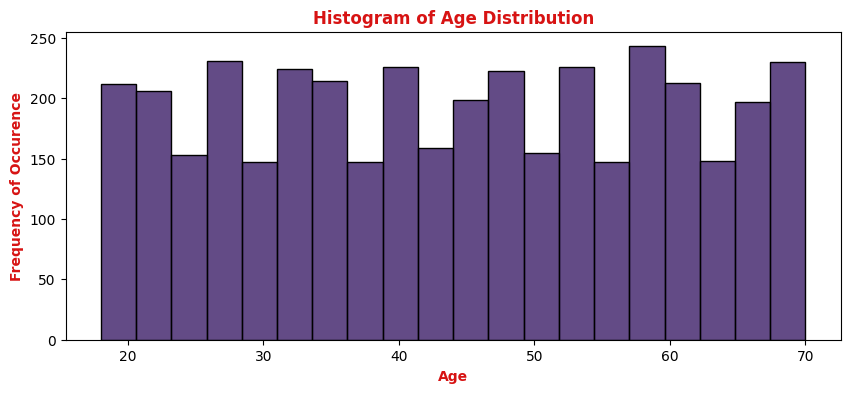

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df, x= 'Age', bins= 20, edgecolor= 'k', color= "#2F0F5D")
plt.xlabel('Age', color= "#D71313", weight= 'bold')
plt.ylabel('Frequency of Occurence', color= "#D71313", weight= 'bold')
plt.title('Histogram of Age Distribution', color= "#D71313", weight= 'bold', fontsize= 12)


*  Box Plot of Purchase Amount by Gender




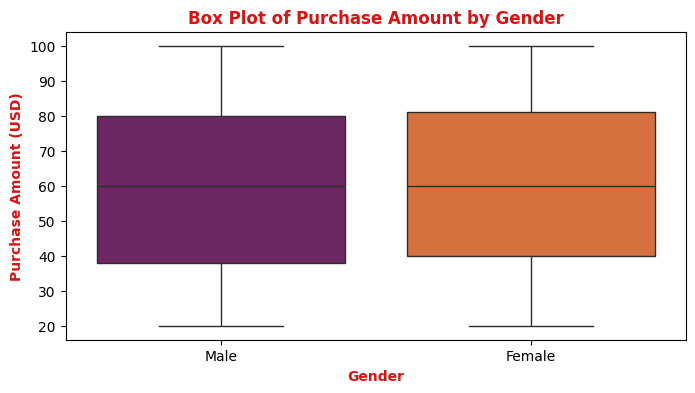

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(df, x= 'Gender', y= 'Purchase Amount (USD)', palette= 'inferno')
plt.xlabel('Gender',color= "#D71313", weight= 'bold')
plt.ylabel('Purchase Amount (USD)', color= "#D71313", weight= 'bold')
plt.title('Box Plot of Purchase Amount by Gender', color= "#D71313", weight= 'bold', fontsize= 12)
plt.show()


*  Scatter Plot of Age vs. Review Rating



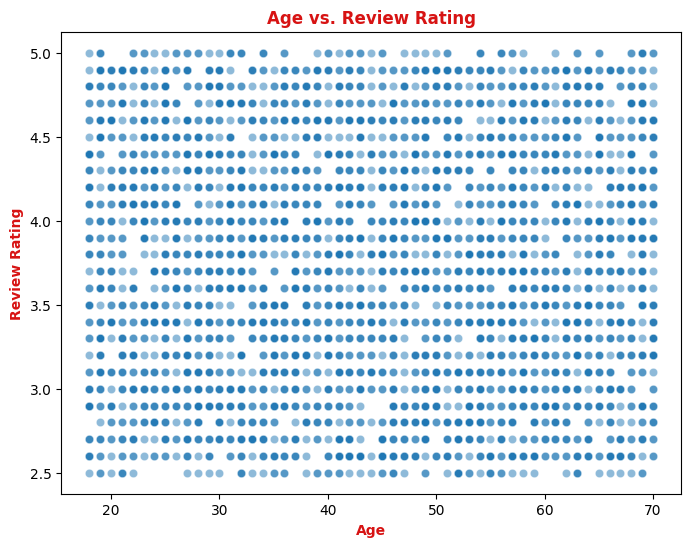

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x= 'Age', y= 'Review Rating', alpha= 0.5)
plt.xlabel('Age', color= "#D71313", weight= 'bold')
plt.ylabel('Review Rating', color= "#D71313", weight= 'bold')
plt.title('Age vs. Review Rating', color= "#D71313", weight= 'bold', fontsize= 12)
plt.show()


*   Stacked Bar Chart of Subscription Status by Gender



Text(0.5, 1.0, 'Subscription Status by Gender')

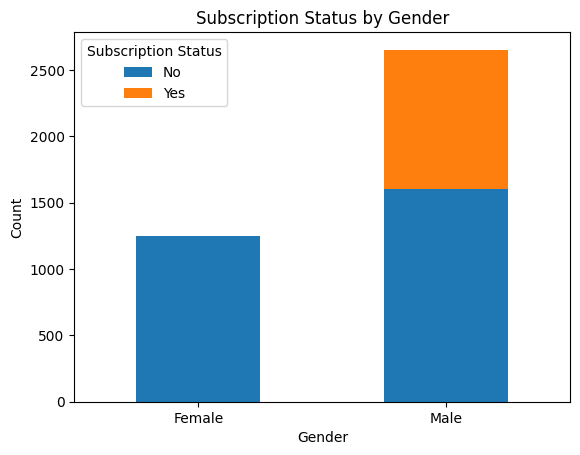

In [ ]:
subscription_gender = df.groupby(['Gender','Subscription Status']).size().unstack()
subscription_gender.plot(kind= 'bar', stacked= True, rot= 0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Subscription Status by Gender')


*  Bar Plot of Payment Method by Season




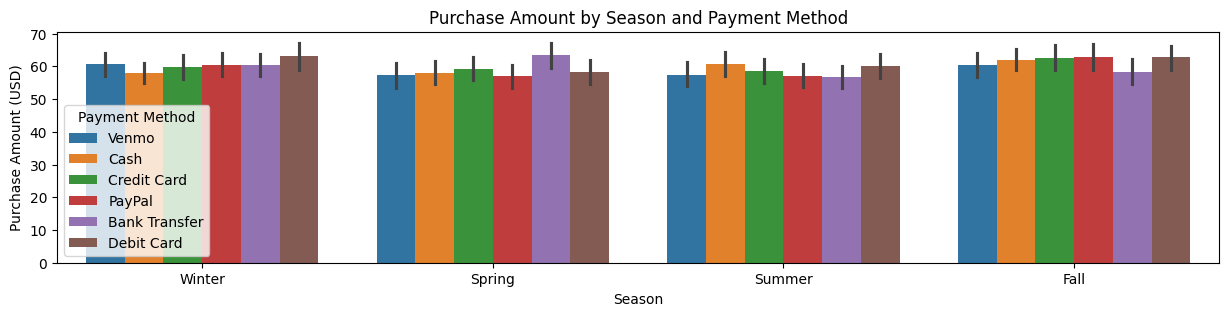

In [ ]:
plt.figure(figsize=(15,3))
sns.barplot(df, x= 'Season', y= 'Purchase Amount (USD)', hue= 'Payment Method')
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()
